In [1]:

from ngsolve import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
import sys
sys.path.append(r'..\..\bin\Release') 
from EMPY_Field import *
sys.path.append('..\model')
from Cylinder_Yaxis_1Layer import Cylinder_Yaxis_1Layer

model=Cylinder_Yaxis_1Layer(sigma=5.e7)
mesh=model.mesh
Draw(mesh)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [2]:
import math
import sys
sys.path.append('C:\EMSolution\EMSolPy3\python\include')
from MatrixSolver import MatrixSolver as solver 

jomega=True
f=0.1
if jomega==True:
    s=2j*math.pi*f
else:
    s=2*math.pi*f
Dirichlet=True
feorder=1

Mu=model.Mu
field=UNIF(0,1,0,0)
symmetric_plane=model.symmetric_plane
Mu=model.Mu
Sigma=model.Sigma
reduced_region=model.reduced_region
total_region=model.total_region
conductive_region=model.conductive_region
air_region=model.air_region
total_boundary=model.total_boundary
reduced_boundary=model.reduced_boundary
conductor_boundary=model.conductor_boundary

mu=4.e-7*math.pi
normal = specialcf.normal(mesh.dim)

fesT=HCurl(mesh, order=feorder, nograd=True, definedon=conductive_region, dirichlet=conductor_boundary, complex=jomega) 
if Dirichlet==False:
    fesOmega=H1(mesh, order=feorder, complex=jomega)
else:
    fesOmega=H1(mesh, order=feorder, dirichlet=reduced_boundary, complex=jomega)
fesTOmega=fesT*fesOmega    
(T,omega),(W,psi) = fesTOmega.TnT()
a= BilinearForm(fesTOmega)
a +=s*Mu*(grad(omega)*grad(psi))*dx(air_region)
a +=s*Mu*((T+grad(omega))*(W+grad(psi)))*dx(conductive_region)
a +=1/Sigma*curl(T)*curl(W)*dx(conductive_region)
with TaskManager():
    a.Assemble()

gfTOmega = GridFunction(fesTOmega)
gfT, gfOmega=gfTOmega.components
if Dirichlet==False:
    b=Bfield(field)
    f = LinearForm(fesTOmega)
    f += s*(normal*b)*psi*ds("reduced_boundary")
    with TaskManager():
        f.Assemble()
    gfTOmega=solver.iccg_solve(fesTOmega, gfTOmega, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=0., complex=jomega)

else:  
    O=Ofield(field)
    gfOmega.Set(O, BND, mesh.Boundaries("reduced_boundary"))
    """
    r=-a.mat*gfTOmega.vec
    gfTOmega=solver.iccg_solve(fesTOmega, gfTOmega, a, r.Evaluate(), tol=1.e-16, max_iter=200, accel_factor=0, complex=jomega)

    """
    f = LinearForm(fesTOmega)
    f +=-s*Mu*grad(gfOmega)*grad(psi)*dx
    with TaskManager():
        f.Assemble()  
    gfTOmega=solver.iccg_solve(fesTOmega, gfTOmega, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=0, complex=jomega)
    
 
#Draw (gfOmega*mu, mesh, order=3, min=0., max=1.0, deformation=False)       
Bfield=Mu*(gfT+grad(gfOmega))
#Draw (Bfield, mesh, order=3, min=0.5, max=1.5, deformation=False)
Jfield=curl(gfT)

mip = mesh(0,0,0)
print(Bfield(mip))


enter iccg_solve
Dof= 2550    matrix size= 61613.0
結果のノルム: 3.440394454694639e-12
power=  (-492.33535689112307+486988.30955769424j)
((0.0017552414110892313+0.0028609126577375946j), (1.4632621560080081-0.979335558458502j), (-5.8426262259769205e-12-1.3261580969506687e-12j))


In [3]:
if jomega==False:
    WJ=Integrate(Jfield*Jfield/Sigma*dx(conductive_region, mesh))
else:
    WJ=Integrate((Jfield.real*Jfield.real+Jfield.imag*Jfield.imag)/Sigma*dx(conductive_region), mesh) /2
print(" Average Joule loss= ", WJ)

 Average Joule loss=  246.16768508023424


In [4]:
if jomega==True:
    print("****** Bfield.real ******")
    Draw (Bfield.real, mesh, order=3, deformation=False) 
    print("****** Bfield.imag ******")
    Draw (Bfield.imag, mesh, order=3, deformation=False) 
    print("****** Jfield.real ******")
    Draw (Jfield.real, mesh, order=3, deformation=False) 
    print("****** Jfield.imag ******")
    Draw (Jfield.imag, mesh, order=3, deformation=False) 
else:
    print("****** Bfield ******")
    Draw (Bfield, mesh, order=3, deformation=False) 
    print("****** Jfield ******")
#    Draw (Jfield, mesh, order=3, deformation=False) 

****** Bfield.real ******


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

****** Bfield.imag ******


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

****** Jfield.real ******


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

****** Jfield.imag ******


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

feOrder=1
Dirichlet=True

Jz real [-1e6, 1e6]
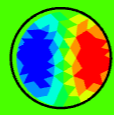

Jz imag [-5e6, 5e6] 
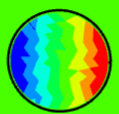

 Average Joule loss=  246.16768507993692

Dirichlet=False

Jz real [-1e6, 1e6]
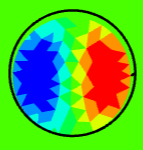

Jz imag [-5e6, 5e6] 
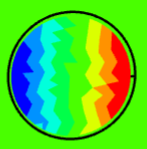

 Average Joule loss=  238.35604627254958